In [1]:
from pmotifs.config import config

In [2]:
from pathlib import Path



ANALYSIS_CANDIDATES = {
    "yeast": {
        "edgelist": config.DATASET_DIRECTORY /  "yeastInter_st.txt",
        "outpath": config.EXPERIMENT_OUT,
    },
}

In [3]:
CANDIDATE = "yeast"

GRAPH_EDGELIST = ANALYSIS_CANDIDATES[CANDIDATE]["edgelist"]
OUT = ANALYSIS_CANDIDATES[CANDIDATE]["outpath"]
GRAPHLET_SIZE = 3

In [4]:
# Retrieve Graphlets and their metrics
from pmotifs.PMotifGraph import PMotifGraph


g = PMotifGraph(GRAPH_EDGELIST, OUT)

In [5]:
g_p = g.load_graphlet_pos_zip(GRAPHLET_SIZE)

Load Graphlet Positions: 100%|██████| 110903/110903 [00:00<00:00, 201315.37it/s]


In [6]:
g_pm = g.load_positional_data(GRAPHLET_SIZE)

Loading Graphlet Metrics: 100%|█████| 110903/110903 [00:00<00:00, 120447.09it/s]


In [7]:
graphlet_lookup = dict(zip(g_p, g_pm.graphlet_metrics))

In [8]:
# Analysis by frequency does not make sense in local scope, all graphlet occurrences account to only one score
graphlet_frequencies = g.load_graphlet_freq_file(GRAPHLET_SIZE)
graphlet_frequencies

{'011 100 100': 110646, '011 101 110': 257}

In [9]:
graphlet_classes = {k.graphlet_class for k in g_p}
graphlet_classes

{'011 100 100', '011 101 110'}

# Analysis

In [10]:
from typing import Union

from pmotifs.GraphletPositionalMetrics import GraphletPositionalMetrics


def get_pos_metric_name():
    return "degree"

def get_positional_metric(pm: GraphletPositionalMetrics) -> Union[int, float]:
    """A wrapper to consolidate metrics
    In the case of this example, motif degree does not need to be consolidated"""
    return pm.degree

In [11]:
import pandas as pd

df = pd.DataFrame([
    {"graphlet_class": g_oc.graphlet_class, get_pos_metric_name(): get_positional_metric(g_pm)}
    for g_oc, g_pm in graphlet_lookup.items()
])

df.head()

,graphlet_class,degree
0,011 100 100,12
1,011 100 100,32
2,011 100 100,16
3,011 100 100,19
4,011 100 100,38


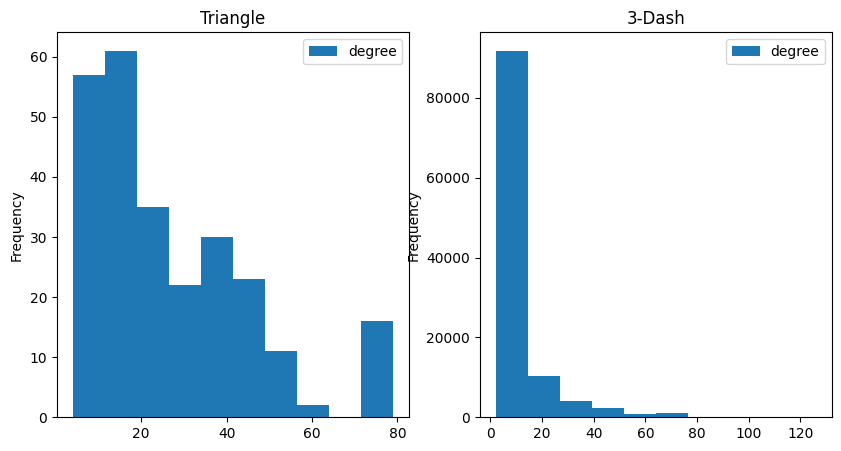

In [12]:
import matplotlib.pyplot as plt

from pmotifs.graphlet_representation import graphlet_class_to_name


fig, axes = plt.subplots(1, len(graphlet_classes), figsize=(len(graphlet_classes) * 5, 5))

for i, graphlet_class in enumerate(graphlet_classes):
    ax = axes[i]
    df[df["graphlet_class"] == graphlet_class].plot.hist(ax=ax)
    ax.set_title(graphlet_class_to_name(graphlet_class))

Text(0.5, 1.0, 'degree Histogram of all 3-Graphlets')

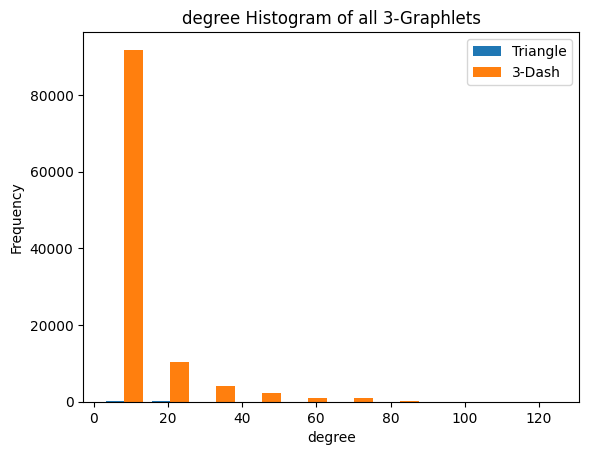

In [13]:
import matplotlib.pyplot as plt

from pmotifs.graphlet_representation import graphlet_class_to_name


fig, ax = plt.subplots(1, 1)

x = [
    df[df["graphlet_class"] == graphlet_class]["degree"]
    for graphlet_class in graphlet_classes
]

ax.hist(x, label=[graphlet_class_to_name(graphlet_class) for graphlet_class in graphlet_classes])
ax.legend()
ax.set_xlabel(get_pos_metric_name())
ax.set_ylabel("Frequency")
ax.set_title(f"{get_pos_metric_name()} Histogram of all {GRAPHLET_SIZE}-Graphlets")

TODO: Which statistical tests would be appropriate here to determine the prevalency of one graphlet class over the other? Or is the plot sufficient?